# Bar Crawl: Detecting Heavy Drinking
--------------------------------------

In [17]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Reading accelerometer data
acc = pd.read_csv('all_accelerometer_data_pids_13.csv')
acc

,time,pid,x,y,z
0,0,JB3156,0.000000,0.000000,0.000000
1,0,CC6740,0.000000,0.000000,0.000000
2,1493733882409,SA0297,0.075800,0.027300,-0.010200
3,1493733882455,SA0297,-0.035900,0.079400,0.003700
4,1493733882500,SA0297,-0.242700,-0.086100,-0.016300
...,...,...,...,...,...
14057562,1493829248196,CC6740,-0.133956,0.124726,-0.010736
14057563,1493829248220,CC6740,-0.100764,0.180872,0.046449
14057564,1493829248245,CC6740,-0.131853,0.195934,0.181088
14057565,1493829248270,CC6740,-0.149704,0.194482,0.202393


In [40]:
# Converting timestamp to datetime
acc['datetime'] = pd.to_datetime(acc['time'], unit='ms')

In [4]:
# Preparing TAC data
import os

folder = 'clean_tac/'

# Get all files in the folder
files = os.listdir(folder)

# Get all the pids
pids = [str(file.split('_clean_TAC.')[0]) for file in files]

# Get all the TAC readings for each person in a dictionary
tac_dict = {pid: pd.read_csv(folder + str(pid) + '_clean_TAC.csv') for pid in pids}


In [5]:
# Function to get TAC data for a specific person
def get_tac_data(pid):
    return tac_dict[pid]

# Concatenating all the TAC readings into one dataframe, with a pid column
def get_tac_full_data():
    tac_full_data = pd.DataFrame()
    for pid in pids:
        tac_data = get_tac_data(pid)
        tac_data = tac_data.assign(pid=[pid]*len(tac_data))
        tac_full_data = pd.concat([tac_full_data,tac_data])
    return tac_full_data

In [6]:
# Getting the complete TAC data
tac = get_tac_full_data()
tac

,timestamp,TAC_Reading,pid
0,1493718714,-0.000482,BK7610
1,1493720697,0.001573,BK7610
2,1493721027,0.002144,BK7610
3,1493721357,0.000877,BK7610
4,1493721686,-0.001145,BK7610
...,...,...,...
49,1493797974,0.029049,SF3079
50,1493799820,0.016286,SF3079
51,1493801652,0.004243,SF3079
52,1493803481,-0.001995,SF3079


In [7]:
# Converting the timestamp column to datetime
tac['datetime'] = pd.to_datetime(tac['timestamp'], unit='s')
tac

,timestamp,TAC_Reading,pid,datetime
0,1493718714,-0.000482,BK7610,2017-05-02 09:51:54
1,1493720697,0.001573,BK7610,2017-05-02 10:24:57
2,1493721027,0.002144,BK7610,2017-05-02 10:30:27
3,1493721357,0.000877,BK7610,2017-05-02 10:35:57
4,1493721686,-0.001145,BK7610,2017-05-02 10:41:26
...,...,...,...,...
49,1493797974,0.029049,SF3079,2017-05-03 07:52:54
50,1493799820,0.016286,SF3079,2017-05-03 08:23:40
51,1493801652,0.004243,SF3079,2017-05-03 08:54:12
52,1493803481,-0.001995,SF3079,2017-05-03 09:24:41


In [8]:
# Plotting TAC readings for each person
import plotly.graph_objects as go

fig = go.Figure()

for person in tac['pid'].unique():
    filtered_tac = tac[tac['pid'] == person]
    fig.add_trace(go.Scatter(x=filtered_tac['datetime'], y=filtered_tac['TAC_Reading'], name=person))

# Creating a button to toggle between each person
buttons = []
for person in tac['pid'].unique():
    button = dict(label=person,
                  method='update',
                  args=[{'visible': [person == visible for visible in tac['pid'].unique()]}])
    buttons.append(button)

fig.update_layout(updatemenus=[dict(buttons=buttons)], height=700)

# Display the figure
fig.show()

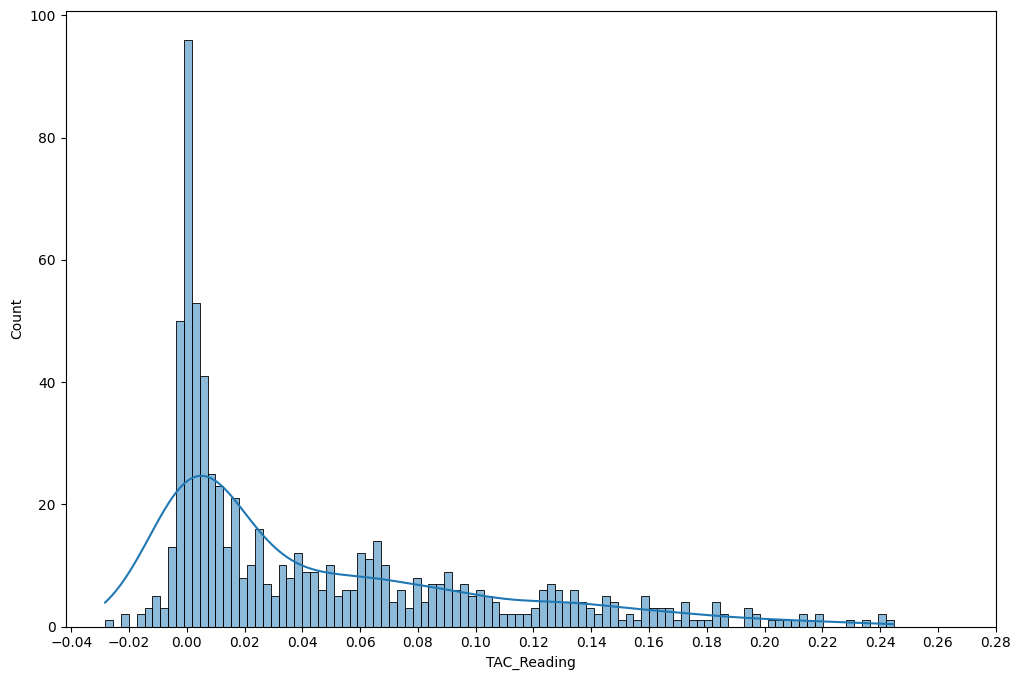

In [9]:
# Plotting histogram of TAC readings
plt.figure(figsize=(12, 8))
_ = sns.histplot(data=tac, x='TAC_Reading', kde=True, bins=100)
_ = plt.xticks(np.arange(-0.04, 0.3, 0.02))

In [10]:
# Extracting TAC data for a specific person
k_tac = tac[tac.pid == 'BK7610']
k_tac.head(5)

,timestamp,TAC_Reading,pid,datetime
0,1493718714,-0.000482,BK7610,2017-05-02 09:51:54
1,1493720697,0.001573,BK7610,2017-05-02 10:24:57
2,1493721027,0.002144,BK7610,2017-05-02 10:30:27
3,1493721357,0.000877,BK7610,2017-05-02 10:35:57
4,1493721686,-0.001145,BK7610,2017-05-02 10:41:26


In [ ]:
acc_per_pid = {pid: acc.loc[acc.pid == pid] for pid in acc['pid'].unique()}

In [95]:
def resample(dataframe, interval='2s'):
    agg_dict = {'mean_x':('x', 'mean'), 'mean_y':('y', 'mean'), 'mean_z':('z', 'mean'),
                'std_x':('x', 'std'), 'std_y':('y', 'std'), 'std_z':('z', 'std'),
                'min_x':('x', 'min'), 'min_y':('y', 'min'), 'min_z':('z', 'min'),
                'max_x':('x', 'max'), 'max_y':('y', 'max'), 'max_z':('z', 'max')}
    return dataframe.resample(interval, on='datetime').agg(**agg_dict)

def resample_per_pid(dataframe, interval='2s'):
    return {pid: resample(dataframe.loc[dataframe.pid == pid], interval) for pid in dataframe['pid'].unique()}

def resample_per_pid_concat(dataframe, interval='2s'):
    return pd.concat(resample_per_pid(dataframe, interval))

In [96]:
acc_2s = resample_per_pid_concat(acc)
acc_2s

mean_x    mean_y    mean_z     std_x     std_y  \
       datetime                                                                
SA0297 2017-05-02 14:04:42 -0.069273 -0.003345 -0.012727  0.104902  0.044612   
       2017-05-02 14:04:44 -0.002765 -0.002369 -0.003815  0.009239  0.017762   
       2017-05-02 14:04:46  0.003825  0.005123 -0.007400  0.043663  0.044416   
       2017-05-02 14:04:48 -0.003041  0.000334 -0.002143  0.015285  0.007594   
       2017-05-02 14:04:50  0.000871 -0.001447 -0.000427  0.015490  0.008256   
...                              ...       ...       ...       ...       ...   
DK3500 2017-05-03 11:11:16 -0.000208  0.000049  0.005895  0.000439  0.000399   
       2017-05-03 11:11:18 -0.000121  0.000114  0.006186  0.000804  0.000817   
       2017-05-03 11:11:20 -0.000237  0.000142  0.006295  0.000557  0.000523   
       2017-05-03 11:11:22 -0.000214  0.000149  0.006200  0.000555  0.000460   
       2017-05-03 11:11:24 -0.000232  0.000167  0.006417  0.000549  0.000501   

                               std_z   min_x   min_y   min_z   max_x   max_y  \
       datetime                                                                
SA0297 2017-05-02 14:04:42  0.025542 -0.2888 -0.0861 -0.0849  0.0758  0.0794   
       2017-05-02 14:04:44  0.003189 -0.0292 -0.0867 -0.0151  0.0248  0.0475   
       2017-05-02 14:04:46  0.037611 -0.1267 -0.0953 -0.1161  0.1672  0.1881   
       2017-05-02 14:04:48  0.046014 -0.0506 -0.0186 -0.1177  0.0251  0.0176   
       2017-05-02 14:04:50  0.030562 -0.0322 -0.0324 -0.1269  0.0724  0.0156   
...                              ...     ...     ...     ...     ...     ...   
DK3500 2017-05-03 11:11:16  0.000492 -0.0017 -0.0015  0.0047  0.0007  0.0010   
       2017-05-03 11:11:18  0.000497 -0.0034 -0.0024  0.0051  0.0022  0.0033   
       2017-05-03 11:11:20  0.000549 -0.0016 -0.0013  0.0052  0.0009  0.0014   
       2017-05-03 11:11:22  0.000552 -0.0015 -0.0012  0.0050  0.0008  0.0013   
       2017-05-03 11:11:24  0.000446 -0.0015 -0.0015  0.0054  0.0011  0.0013   

                             max_z  
       datetime                     
SA0297 2017-05-02 14:04:42  0.0134  
       2017-05-02 14:04:44  0.0036  
       2017-05-02 14:04:46  0.0841  
       2017-05-02 14:04:48  0.1393  
       2017-05-02 14:04:50  0.0697  
...                            ...  
DK3500 2017-05-03 11:11:16  0.0071  
       2017-05-03 11:11:18  0.0074  
       2017-05-03 11:11:20  0.0075  
       2017-05-03 11:11:22  0.0080  
       2017-05-03 11:11:24  0.0074  

[362550 rows x 12 columns]

In [133]:
def interpolate_tac(tac, interval='2s'):
    return tac.set_index('datetime').resample(interval).mean().interpolate(method='time')

def interpolate_tac_per_pid(tac, interval='2s'):
    return {pid: interpolate_tac(tac.loc[tac.pid == pid], interval) for pid in tac['pid'].unique()}

def interpolate_tac_per_pid_concat(tac, interval='2s'):
    return pd.concat(interpolate_tac_per_pid(tac, interval))

In [134]:
tac_2s = interpolate_tac_per_pid_concat(tac, interval='2s')
tac_2s

timestamp  TAC_Reading
       datetime                                      
BK7610 2017-05-02 09:51:54  1.493719e+09    -0.000482
       2017-05-02 09:51:56  1.493719e+09    -0.000480
       2017-05-02 09:51:58  1.493719e+09    -0.000478
       2017-05-02 09:52:00  1.493719e+09    -0.000476
       2017-05-02 09:52:02  1.493719e+09    -0.000474
...                                  ...          ...
SF3079 2017-05-03 09:55:02  1.493805e+09    -0.002915
       2017-05-03 09:55:04  1.493805e+09    -0.002916
       2017-05-03 09:55:06  1.493805e+09    -0.002917
       2017-05-03 09:55:08  1.493805e+09    -0.002918
       2017-05-03 09:55:10  1.493805e+09    -0.002919

[555506 rows x 2 columns]

In [136]:
# join the two dataframes
acc_tac = acc_2s.join(tac_2s, how='inner') # inner because we want to keep only the rows where both dataframes have data
acc_tac

mean_x    mean_y    mean_z     std_x     std_y  \
       datetime                                                                
SA0297 2017-05-02 14:04:42 -0.069273 -0.003345 -0.012727  0.104902  0.044612   
       2017-05-02 14:04:44 -0.002765 -0.002369 -0.003815  0.009239  0.017762   
       2017-05-02 14:04:46  0.003825  0.005123 -0.007400  0.043663  0.044416   
       2017-05-02 14:04:48 -0.003041  0.000334 -0.002143  0.015285  0.007594   
       2017-05-02 14:04:50  0.000871 -0.001447 -0.000427  0.015490  0.008256   
...                              ...       ...       ...       ...       ...   
DK3500 2017-05-03 09:35:52 -0.000252  0.000075  0.004822  0.000548  0.000403   
       2017-05-03 09:35:54 -0.000274  0.000137  0.004980  0.000495  0.000412   
       2017-05-03 09:35:56 -0.000225  0.000073  0.005020  0.000508  0.000435   
       2017-05-03 09:35:58 -0.000137  0.000162  0.005169  0.000497  0.000411   
       2017-05-03 09:36:00 -0.000256  0.000055  0.005355  0.000507  0.000468   

                               std_z   min_x   min_y   min_z   max_x   max_y  \
       datetime                                                                
SA0297 2017-05-02 14:04:42  0.025542 -0.2888 -0.0861 -0.0849  0.0758  0.0794   
       2017-05-02 14:04:44  0.003189 -0.0292 -0.0867 -0.0151  0.0248  0.0475   
       2017-05-02 14:04:46  0.037611 -0.1267 -0.0953 -0.1161  0.1672  0.1881   
       2017-05-02 14:04:48  0.046014 -0.0506 -0.0186 -0.1177  0.0251  0.0176   
       2017-05-02 14:04:50  0.030562 -0.0322 -0.0324 -0.1269  0.0724  0.0156   
...                              ...     ...     ...     ...     ...     ...   
DK3500 2017-05-03 09:35:52  0.000474 -0.0014 -0.0011  0.0036  0.0017  0.0012   
       2017-05-03 09:35:54  0.000517 -0.0015 -0.0009  0.0039  0.0009  0.0009   
       2017-05-03 09:35:56  0.000497 -0.0011 -0.0008  0.0039  0.0014  0.0012   
       2017-05-03 09:35:58  0.000435 -0.0012 -0.0006  0.0040  0.0011  0.0010   
       2017-05-03 09:36:00  0.000460 -0.0014 -0.0010  0.0044  0.0012  0.0014   

                             max_z     timestamp  TAC_Reading  
       datetime                                                
SA0297 2017-05-02 14:04:42  0.0134  1.493734e+09     0.032019  
       2017-05-02 14:04:44  0.0036  1.493734e+09     0.032021  
       2017-05-02 14:04:46  0.0841  1.493734e+09     0.032023  
       2017-05-02 14:04:48  0.1393  1.493734e+09     0.032026  
       2017-05-02 14:04:50  0.0697  1.493734e+09     0.032028  
...                            ...           ...          ...  
DK3500 2017-05-03 09:35:52  0.0058  1.493804e+09     0.011939  
       2017-05-03 09:35:54  0.0063  1.493804e+09     0.011940  
       2017-05-03 09:35:56  0.0063  1.493804e+09     0.011941  
       2017-05-03 09:35:58  0.0064  1.493804e+09     0.011942  
       2017-05-03 09:36:00  0.0066  1.493804e+09     0.011943  

[322098 rows x 14 columns]

<AxesSubplot:xlabel='datetime', ylabel='mean_x'>

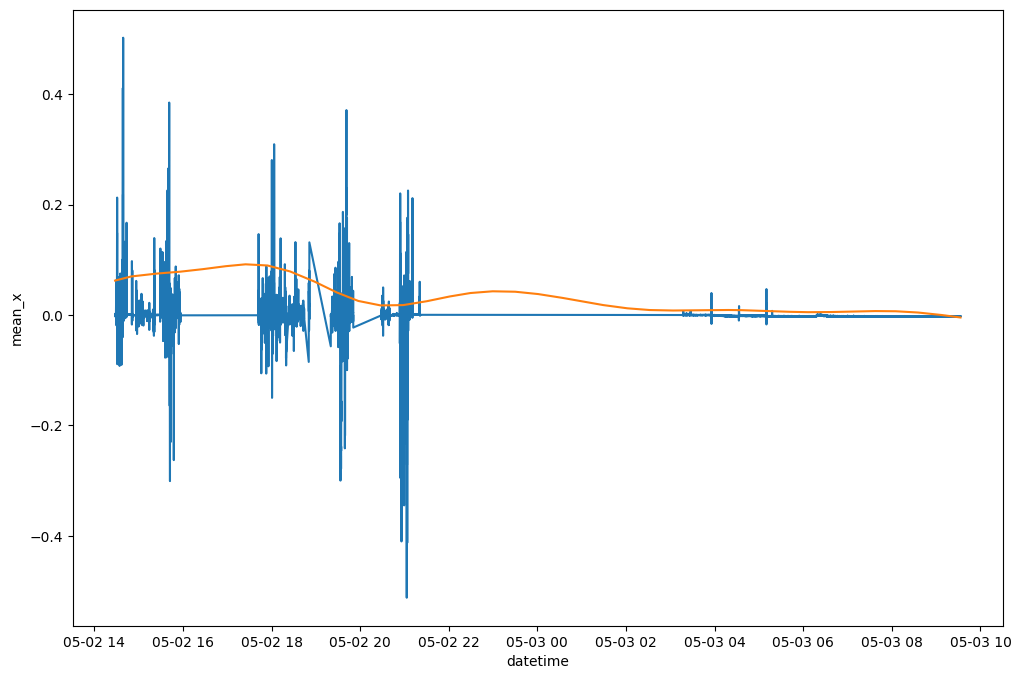

In [137]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=acc_tac.loc['PC6771'][['mean_x']].reset_index(), x='datetime', y='mean_x')
sns.lineplot(data=acc_tac.loc['PC6771'][['TAC_Reading']].reset_index(), x='datetime', y='TAC_Reading')